<a href="https://colab.research.google.com/github/ReemAlsharabi/KAUST-Academy/blob/main/summer-program/week3/GNNs/day3/2_GCN_on_Cora_Dataset_Pytorch_Geometric_sv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This tutorial is adapted from [Dair-AI Pytorch Geometric Tutorial](https://github.com/dair-ai/GNNs-Recipe) by Elvis Saravia.

## Introduction to GNNs with PyTorch Geometric

In this short notebook, the goal is to provide a introductory guide to get started with Graph Neural Networks using the popular library called [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/index.html). PyTorch Geometric is a PyTorch based libary hence we will be using PyTorch in this tutorial.

The code used in this tutorial has been adapted from their official [examples](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html).

In [ ]:
# Find the CUDA version PyTorch was installed with
!python -c "import torch; print(torch.version.cuda)"

11.8


In [ ]:
# PyTorch version
!python -c "import torch; print(torch.__version__)"

2.0.1+cu118


In [ ]:
import os
import torch
os.environ['TORCH'] = torch.version.__version__
print(torch.version.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git


2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 44.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## Getting Started

Import PyTorch

The great thing about PyTorch Geometric is that it contain useful functionalities to import and load graph related data.

Now let's create an unweighted and undirected graph with three nodes and four total edges.

In [ ]:
from torch_geometric.data import Data

# define edge list
edge_index = torch.tensor([[0, 1, 1, 2], [1, 0, 2, 1]], dtype=torch.long)
print(edge_index)
# define node features
x = torch.tensor([[-1], [0], [1]])

# create graph data object
data = Data(x=x, edge_index=edge_index)
print(data)

tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])
Data(x=[3, 1], edge_index=[2, 4])


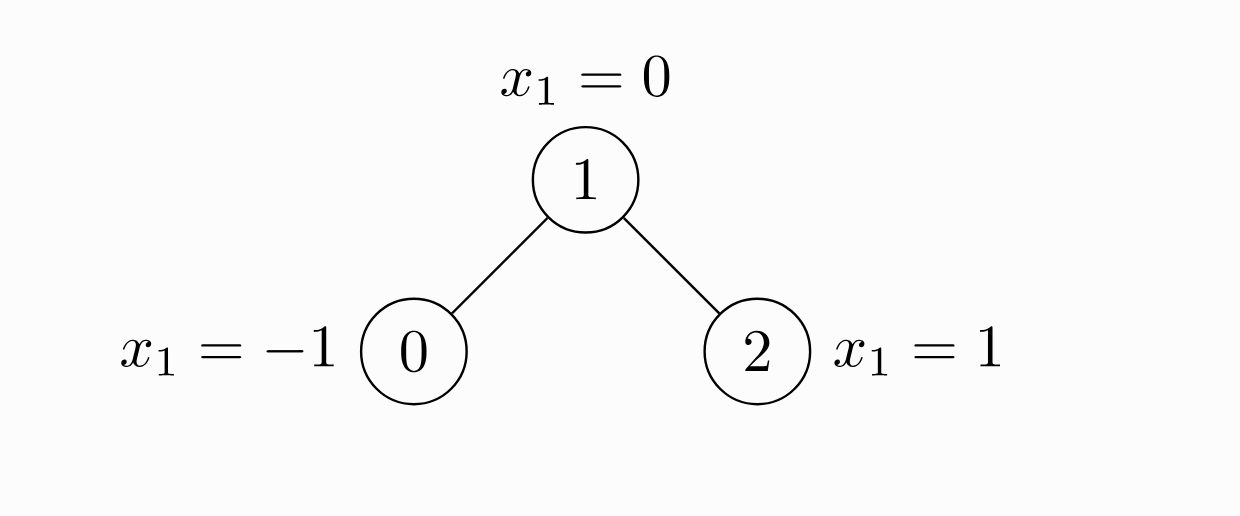

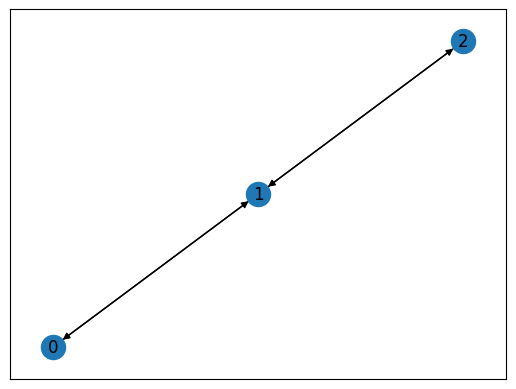

In [ ]:
# Visualization function for NX graph or PyTorch tensor
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx


G = to_networkx(data, to_undirected=False)
nx.draw_networkx(G)


Our data object `Data` has many useful utility functions to check the properties of the graph.

In [ ]:
# check number of edges of the graph
print(data.num_edges)

4


In [ ]:
# check number of nodes of the graph
print(data.num_nodes)

3


In [ ]:
# check number of features of the graph
print(data.num_features)

1


In [ ]:
# check if graph is directed
print(data.is_directed())

False


Find more fun functions related to graph data [here](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data).

## Loading Data

One of the cool things about the PyTorch Geometric library is that it contains out-of-the-box benchmark datasets that are ready to use and explore. A popular dataset is the Cora dataset that is used for supervised graph node classification.

"The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words." - [Papers with Code](https://paperswithcode.com/dataset/cora).

Let's load the Cora dataset:

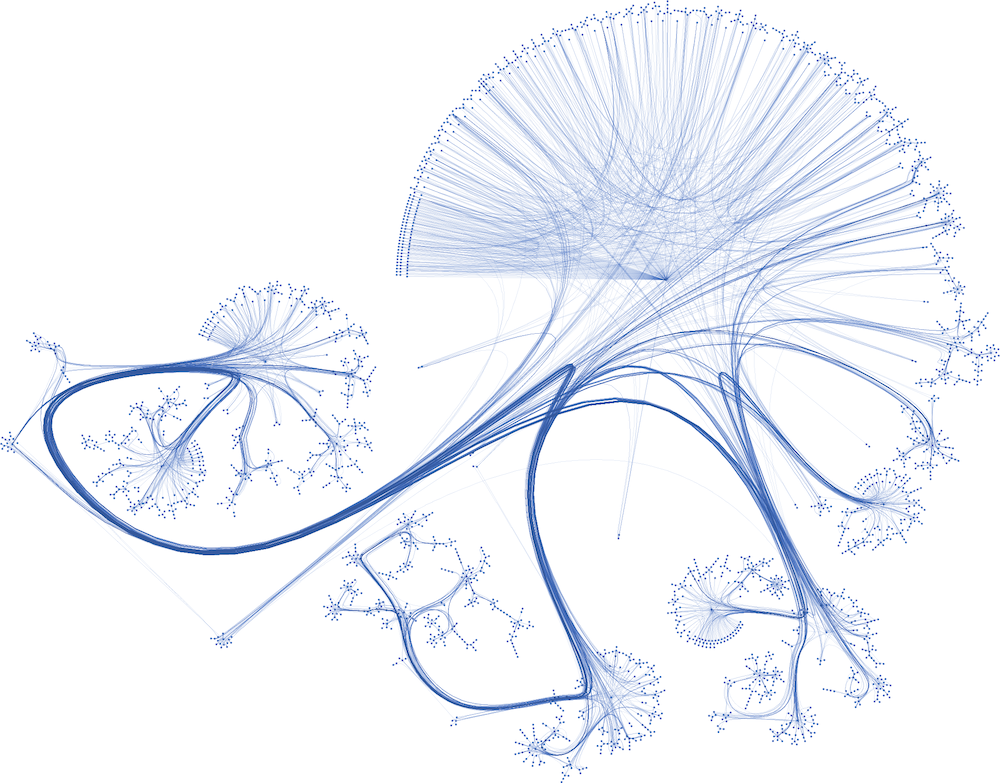

In [ ]:
from torch_geometric.datasets import Planetoid
dataset = Planetoid(root='tmp/Cora', name='Cora')

Let's check some of the properties of the Cora dataset.

In [ ]:
# number of graphs
print("Number of graphs: ", len(dataset))

# number of features
print("Number of features: ", dataset.num_features)

# number of classes
print("Number of classes: ", dataset.num_classes)

Number of graphs:  1
Number of features:  1433
Number of classes:  7


Classes:
*   Case_Based
*   Genetic_Algorithms
*   Neural_Networks
*   Probabilistic_Methods
*   Reinforcement_Learning
*   Rule_Learning
*   Theory


We can see that this particular graph dataset only contains one graph. Graph data can be very complex and can include multiple graphs depending on the type of data and application. Let's check more feature of the Cora dataset:

In [ ]:
# select the first graph
data = dataset[0]

# number of nodes
print("Number of nodes: ", data.num_nodes)

# number of edges
print("Number of edges: ", data.num_edges)

# check if directed
print("Is directed: ", data.is_directed())

Number of nodes:  2708
Number of edges:  10556
Is directed:  False


,count,mean,std,min,25%,50%,75%,max
0,2708.0,3.9,5.23,1.0,2.0,3.0,5.0,168.0


2708
10556


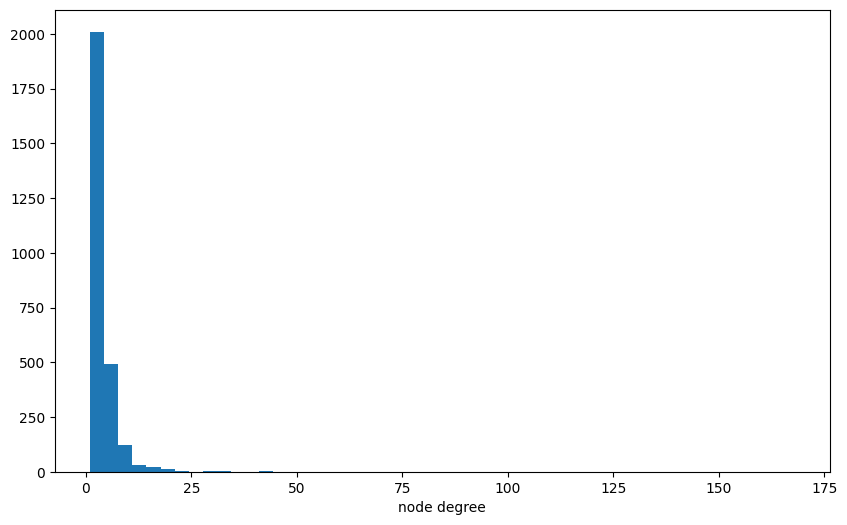

In [ ]:
import pandas as pd
G = to_networkx(data, to_undirected=True)
degrees = [val for (node, val) in G.degree()]
display(pd.DataFrame(pd.Series(degrees).describe()).transpose().round(2))
print(len(degrees))
print(sum(degrees))
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50)
plt.xlabel("node degree")
plt.show()

threshold 0.011821204285186553


/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


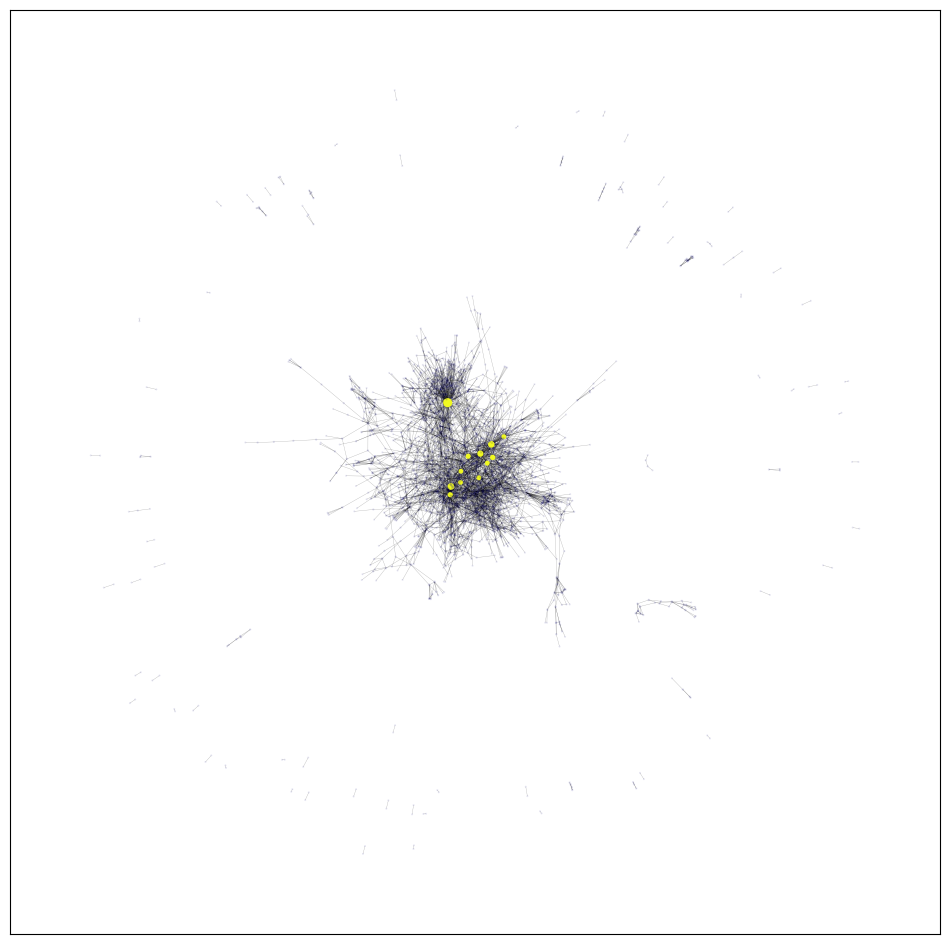

In [ ]:
import numpy as np
G = to_networkx(data, to_undirected=True)
pos = nx.spring_layout(G, seed=42)
cent = nx.degree_centrality(G)
node_size = list(map(lambda x: x * 500, cent.values()))
cent_array = np.array(list(cent.values()))
threshold = sorted(cent_array, reverse=True)[10]
print("threshold", threshold)
cent_bin = np.where(cent_array >= threshold, 1, 0.1)
plt.figure(figsize=(12, 12))
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size,
                               cmap=plt.cm.plasma,
                               node_color=cent_bin,
                               nodelist=list(cent.keys()),
                               alpha=cent_bin)
edges = nx.draw_networkx_edges(G, pos, width=0.25, alpha=0.3)
plt.show()

You can sample nodes from the graph this way:

In [ ]:
# sample nodes from the graph
print("Shape of sample nodes: ", data.x[:5].shape)
print(data.x[5])

Shape of sample nodes:  torch.Size([5, 1433])
tensor([0., 0., 0.,  ..., 0., 0., 0.])


We extracted 5 nodes from the graph and checked its shape. You will see that each node has `1433` features.

Another great advantage of using PyTorch Geometric to load the Cora data is that it comes pre-processed and ready to use. It also has the splits for training, validation and test which we can directly use for training a GNN.

Let's check some stats for the partitions of the data:

In [ ]:
# check training nodes
print("# of nodes to train on: ", data.train_mask.sum().item())

# check test nodes
print("# of nodes to test on: ", data.test_mask.sum().item())

# check validation nodes
print("# of nodes to validate on: ", data.val_mask.sum().item())

# of nodes to train on:  140
# of nodes to test on:  1000
# of nodes to validate on:  500


That information is important as it will indicate to our model which nodes to train against and which to test against, and so on.

When training neural networks we train them using batches of data. PyTorch Geometric provides efficient processes to load batches of data.

PyTorch Geometric contains a data loader which is a very popular feature in PyTorch to efficiently load data when training neural networks.

So let's try to load the data using the built in `DataLoader`:

In [ ]:
from torch_geometric.datasets import Planetoid
from torch_geometric.loader import DataLoader
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(device)

cuda


In [ ]:
dataset = Planetoid(root='tmp/Cora', name='Cora')
data = dataset[0].to(device)

Print some quick statistics about the data:

In [ ]:
print("X shape: ", data.x.shape)
print("Edge shape: ", data.edge_index.shape)
print("Y shape: ", data.y.shape)

X shape:  torch.Size([2708, 1433])
Edge shape:  torch.Size([2, 10556])
Y shape:  torch.Size([2708])


## Model and Training

Finally, let's define a standard GCN to train on the Cora dataset. The aim is to train a model that gets better at predicting the class of the node.

We are using the built-in `GCNConv` model but we could easily implement your own.

The model below uses two `GCNConv` layers. The first layer is followed by a non-linearity `ReLU` and `Dropout`. The result is fed to the second layer on top of which we apply `Softmax` to get distribution over the number of classes.

In [ ]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        """ GCNConv layers """
        self.conv1 = GCNConv(data.num_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

Initial model and optimizer

In [ ]:
model = GCN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

Define axcuracy function for evaluating performance:

In [ ]:
# useful function for computing accuracy
def compute_accuracy(pred_y, y):
    return (pred_y == y).sum()

And finally we train the model on the training nodes for 200 epochs:

In [ ]:
# train the model
model.train()
losses = []
accuracies = []
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)

    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    correct = compute_accuracy(out.argmax(dim=1)[data.train_mask], data.y[data.train_mask])
    acc = int(correct) / int(data.train_mask.sum())
    losses.append(loss.item())
    accuracies.append(acc)

    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print('Epoch: {}, Loss: {:.4f}, Training Acc: {:.4f}'.format(epoch+1, loss.item(), acc))


Epoch: 10, Loss: 0.8593, Training Acc: 0.9143
Epoch: 20, Loss: 0.2687, Training Acc: 0.9714
Epoch: 30, Loss: 0.0876, Training Acc: 0.9929
Epoch: 40, Loss: 0.0703, Training Acc: 0.9857
Epoch: 50, Loss: 0.0411, Training Acc: 1.0000
Epoch: 60, Loss: 0.0422, Training Acc: 1.0000
Epoch: 70, Loss: 0.0401, Training Acc: 1.0000
Epoch: 80, Loss: 0.0429, Training Acc: 1.0000
Epoch: 90, Loss: 0.0256, Training Acc: 1.0000
Epoch: 100, Loss: 0.0235, Training Acc: 1.0000
Epoch: 110, Loss: 0.0426, Training Acc: 1.0000
Epoch: 120, Loss: 0.0365, Training Acc: 1.0000
Epoch: 130, Loss: 0.0431, Training Acc: 1.0000
Epoch: 140, Loss: 0.0248, Training Acc: 1.0000
Epoch: 150, Loss: 0.0350, Training Acc: 1.0000
Epoch: 160, Loss: 0.0250, Training Acc: 1.0000
Epoch: 170, Loss: 0.0353, Training Acc: 1.0000
Epoch: 180, Loss: 0.0269, Training Acc: 1.0000
Epoch: 190, Loss: 0.0211, Training Acc: 1.0000
Epoch: 200, Loss: 0.0231, Training Acc: 1.0000


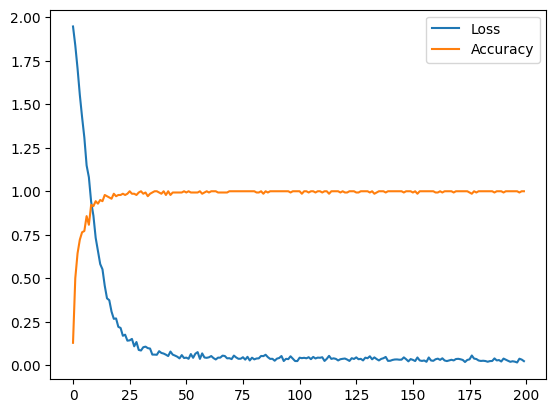

In [ ]:
# plot the loss and accuracy
import matplotlib.pyplot as plt
plt.plot(losses)
plt.plot(accuracies)
plt.legend(['Loss', 'Accuracy'])
plt.show()

It looks like the model achieves a very high accuracy and small loss on the training dataset. To see how well it generalizes, let's test on the testing nodes:

In [ ]:
# evaluate the model on test set
model.eval()
pred = model(data).argmax(dim=1)
correct = compute_accuracy(pred[data.test_mask], data.y[data.test_mask])
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')

Accuracy: 0.8070


# Exercies 1:  PROTEINS Dataset

The PROTEINS dataset is a graph-based dataset where each graph represents a protein structure. The graphs are derived from a subset of the Protein Data Bank (PDB), a database that collects 3D structures of large biological molecules, such as proteins and nucleic acids.

* Nodes: Each node in the graph represents an amino acid, the building blocks of proteins.
* Edges: Edges between nodes represent the spatial proximity of the corresponding amino acids in the 3D structure of the protein. An edge is created if two amino acids are close enough in the 3D space.
* Features: Each node (amino acid) is associated with a feature vector. The specific features can vary, but they often include properties like the type of the amino acid, its physicochemical properties, or its position in the sequence.
* Labels: Each graph (protein) is associated with a binary label indicating whether the protein is an enzyme or a non-enzyme. This makes the dataset suitable for binary graph classification tasks.

Enzymes are proteins comprised of amino acids linked together in one or more polypeptide chains.

In [ ]:
import numpy as np
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

In [ ]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='/tmp/PROTEINS', name='PROTEINS')

print(f'Dataset: {dataset}:')
print('======================')
# TODO: print the number of graphs, the number of features, and the number of classes respectively.
print(f'Number of graphs: {...}')
print(f'Number of features: {...}')
print(f'Number of classes: {...}')

In [ ]:
labels = dataset.data.y.unique()
print(f'Possible classes: {labels.tolist()}')

In [ ]:
from collections import Counter

label_counts = Counter(dataset.data.y.tolist())
print(f'Number of samples per class: {label_counts}')

In [ ]:
# TODO: Define the device
device = ...
# TODO: Select the first graph and move it to the device
data = ...

# TODO: Print the number of nodes
print("Number of nodes: ", ...)

# TODO: Print number of edges
print("Number of edges: ", ...)

# TODO: Check if directed
print("Is directed: ", ...)

In [ ]:
# TODO: Convert the PyG graph to undirected networkx graph
from torch_geometric.utils import to_networkx

G = ...
pos = nx.spring_layout(G, seed=41)
cent = nx.degree_centrality(G)
node_size = list(map(lambda x: x * 500, cent.values()))
plt.figure(figsize=(12, 12))
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_size,
                               cmap=plt.cm.plasma,
                               alpha=cent_bin)
edges = nx.draw_networkx_edges(G, pos, width=0.25, alpha=0.3)
plt.show()

In [ ]:

dataset = dataset.shuffle()
# TODO: Divide the dataset into training (80%), validation(10%), and testing(10%).
train_dataset = ...
val_dataset = ...
test_dataset = ...

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of validation graphs: {len(val_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

In [ ]:
from torch_geometric.loader import DataLoader

# TODO: Create the dataloaders for the training, validation, and testing.
Batch_size = 64
train_loader = ...
val_loader = ...
test_loader = ...

In [ ]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels, num_features, num_classes):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        # TODO: Create a model consist of two GCN layers and one linear layer
        self.conv1 = ...
        self.conv2 = ...
        self.lin = ...

    def forward(self, x, edge_index, batch):
        # TODO: Define the forward pass of the data with Relu activation
        x = ...
        x = ...
        x = ...

        # TODO: Add a global average pooling
        x = ...

        # TODO: Apply a dropout of 50% and the final classifier
        x = ...
        x = ...

        return x

In [ ]:
model = GCN(hidden_channels=64, num_features=dataset.num_features, num_classes=dataset.num_classes)
# TODO: Define an optimizer of your choice
optimizer = ...
# TODO: Define CrossEntropy Loss
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
        out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
        # TODO: Compute the loss
        loss = ...
        loss.backward()  # Derive gradients.
        optimizer.step()  # Update parameters based on gradients.
        optimizer.zero_grad()  # Clear gradients.

def test(loader):
    model.eval()

    correct = 0
    for data in loader:  # Iterate in batches over the test dataset.
        out = model(data.x, data.edge_index, data.batch)
        pred = out.argmax(dim=1)  # Use the class with highest probability.
        correct += int((pred == data.y).sum())  # Check against ground-truth labels.
    return correct / len(loader.dataset)  # Derive ratio of correct predictions.


for epoch in range(1, 201):
    train()
    train_acc = test(train_loader)
    val_acc = test(val_loader)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f},Val Acc: {val_acc:.4f}')

In [ ]:
test_acc = test(test_loader)
print(f'Test Accuracy: {test_acc:.4f}')

You should modify your model until getting at least 65% test accuracy. state-of-the-art methods achieve accuracies around 75-85% on the PROTEINS dataset.


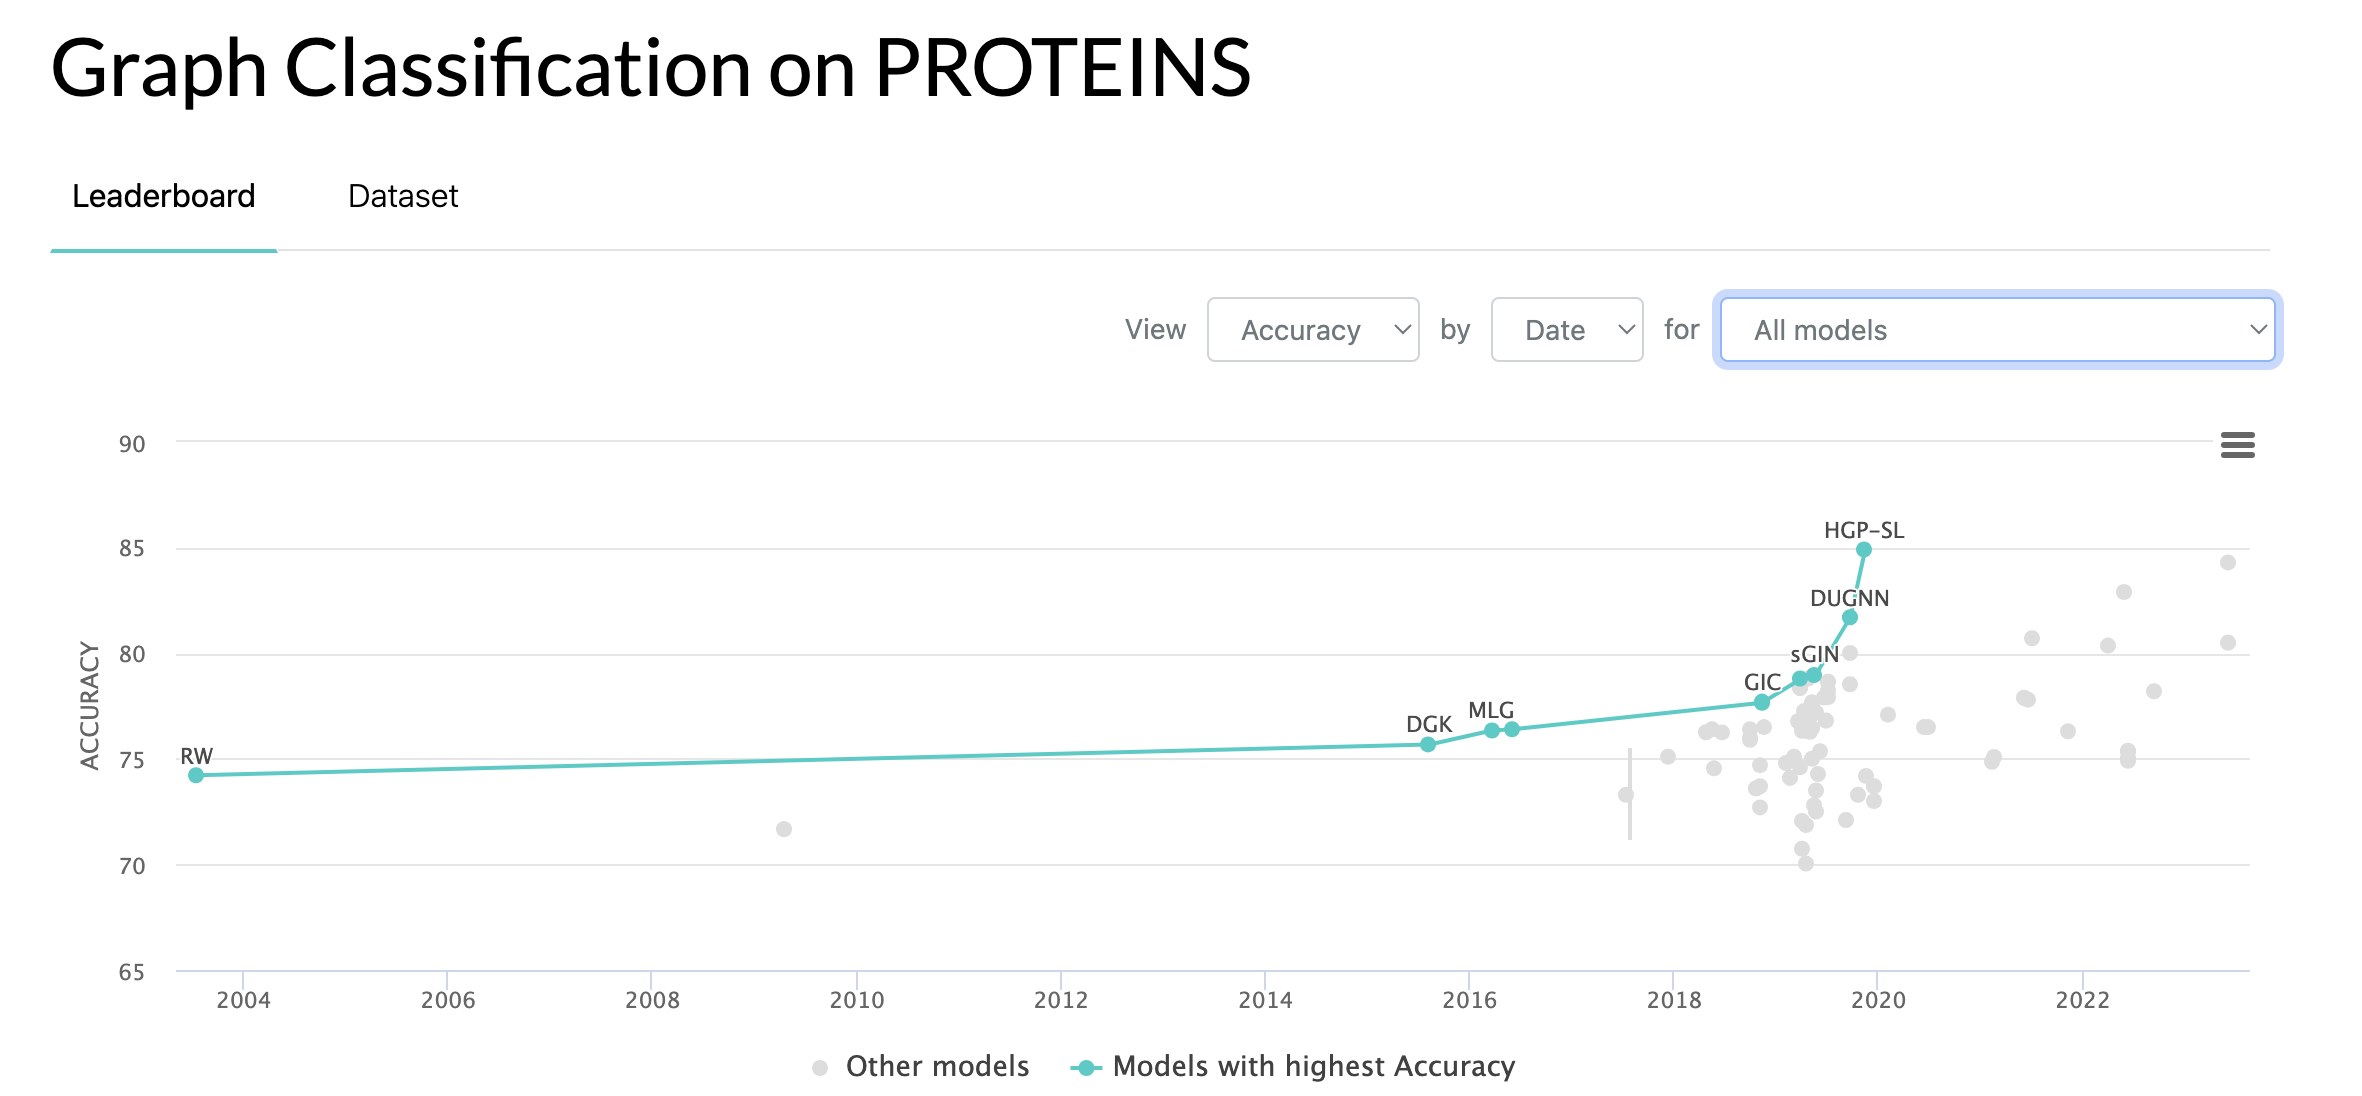

PROTEINS dataset:
1. Hierarchical Graph Pooling with Structure Learning (HGP-SL) - 2019, Accuracy: 84.91%.
2. Randomized Schur Complement Views for Graph Contrastive Learning (rLap) - 2023, Accuracy: 84.3%.
3. Template based Graph Neural Network with Optimal Transport Distances (TFGW ADJ) - 2022, Accuracy: 82.9%.
4. Learning Universal Graph Neural Network Embeddings With Aid Of Transfer Learning (DUGNN) - 2019, Accuracy: 81.70%.
5. Maximum Entropy Weighted Independent Set Pooling for Graph Neural Networks (MEWISPool) - 2021, Accuracy: 80.71%.
6. CIN++: Enhancing Topological Message Passing - 2023, Accuracy: 80.5%.
7. Relational Reasoning Over Spatial-Temporal Graphs for Video Summarization (SAEPool) - 2022, Accuracy: 80.36%.
8. Universal Graph Transformer Self-Attention Networks (U2GNN) - 2019, Accuracy: 80.01%. Unsupervised method.